In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Thesis Cloud Images /pics_0402_0406.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sky_images/')


In [ ]:
!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cv2

<module 'cv2' from '/usr/local/lib/python3.9/dist-packages/cv2/__init__.py'>

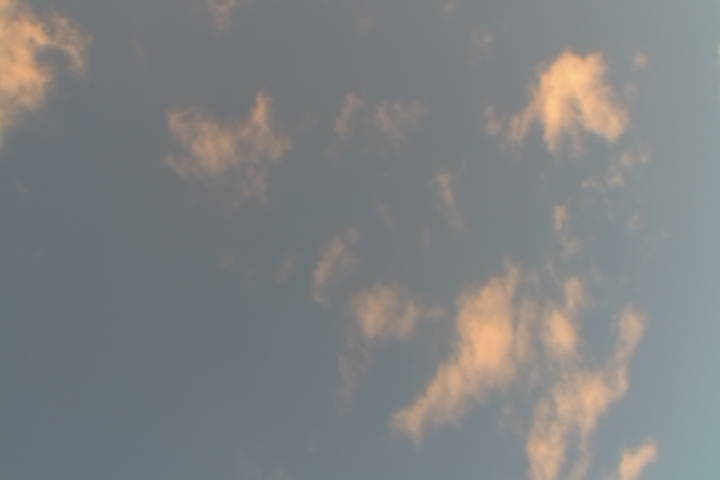

In [ ]:
img = cv2.imread('/content/sky_images/pics/202304021712.jpg')
cv2_imshow(img)


<ipython-input-43-258f2c73b448>:40: RuntimeWarning: invalid value encountered in true_divide
  edge_features = (sobel_mag - sobel_mean) / sobel_std


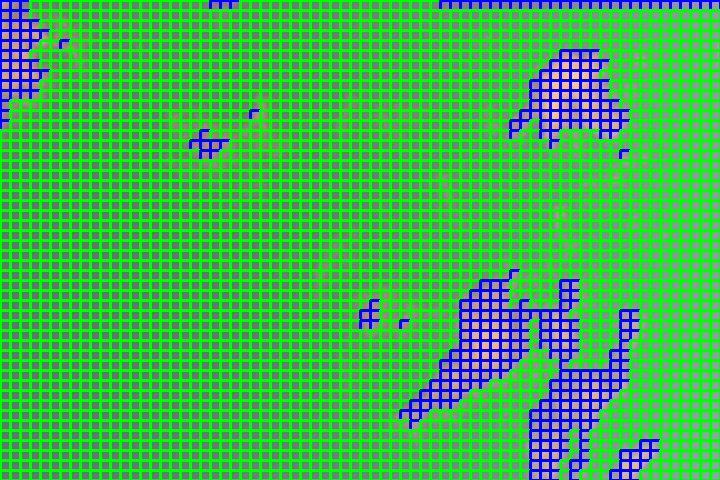

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.filters import sobel_h, sobel_v
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/sky_images/pics/202304021712.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the grid size
grid_size = 10

# Initialize the cloud and sky grids
cloud_grid = np.zeros((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)
sky_grid = np.ones((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)

# Compute the color features, texture features, and edge features for each grid
for i in range(cloud_grid.shape[0]):
    for j in range(cloud_grid.shape[1]):
        # Extract the grid from the grayscale image
        grid = gray[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size]
        
        # Compute the mean color of the grid
        mean_color = np.mean(img[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size], axis=(0,1))
        
        # Compute the texture features of the grid using the LBP algorithm
        lbp = local_binary_pattern(grid, 8, 1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 256), range=(0, 255))
        texture_features = hist / np.sum(hist)
        
        # Compute the edge features of the grid using the Sobel filters
        sobel_x = sobel_h(grid)
        sobel_y = sobel_v(grid)
        sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
        sobel_mean = np.mean(sobel_mag)
        sobel_std = np.std(sobel_mag)
        edge_features = (sobel_mag - sobel_mean) / sobel_std
        
        # Apply the color, texture, and edge thresholds to classify the grid as cloud or sky
        if (mean_color[0] > 40 and mean_color[1] > 80 and mean_color[2] > 100) or np.max(texture_features) > 0.7 or np.max(edge_features) > 100:
            sky_grid[i, j] = 0
            color = (255, 0, 0)  # green
        else:
            cloud_grid[i, j] = 1
            color = (0, 255, 0)  # blue
            
        # Draw the grid on the original image
        cv2.rectangle(img, (j*grid_size, i*grid_size), ((j+1)*grid_size, (i+1)*grid_size), color, 2)

# Display the resulting image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#Create dataset 
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.filters import sobel_h, sobel_v
import os

# Define the grid size
grid_size = 20

# Loop through each image in the folder
for file_name in os.listdir('/content/sky_images/pics'):
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
     # Load the image
      img = cv2.imread(os.path.join('/content/sky_images/pics', file_name))

      # Convert to grayscale
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      # Initialize the cloud and sky grids
      cloud_grid = np.zeros((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)
      sky_grid = np.ones((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)

      # Compute the color features, texture features, and edge features for each grid
      for i in range(cloud_grid.shape[0]):
          for j in range(cloud_grid.shape[1]):
              # Extract the grid from the grayscale image
              grid = gray[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size]
              
              # Compute the mean color of the grid
              mean_color = np.mean(img[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size], axis=(0,1))
              
              # Compute the texture features of the grid using the LBP algorithm
              lbp = local_binary_pattern(grid, 8, 1, method='uniform')
              hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 256), range=(0, 255))
              texture_features = hist / np.sum(hist)
              
              # Compute the edge features of the grid using the Sobel filters
              sobel_x = sobel_h(grid)
              sobel_y = sobel_v(grid)
              sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
              sobel_mean = np.mean(sobel_mag)
              sobel_std = np.std(sobel_mag)
              edge_features = (sobel_mag - sobel_mean) / sobel_std
              
              # Apply the color, texture, and edge thresholds to classify the grid as cloud or sky
              if (mean_color[0] > 80 and mean_color[1] > 80 and mean_color[2] > 80) or np.max(texture_features) > 0.7 or np.max(edge_features) > 100:
                  sky_grid[i, j] = 0
                  color = (255, 0, 0)  # green
              else:
                  cloud_grid[i, j] = 1
                  color = (0, 255, 0)  # blue
                  
              # Draw the grid on the original image
              cv2.rectangle(img, (j*grid_size, i*grid_size), ((j+1)*grid_size, (i+1)*grid_size), color, 2)

      # Save the labeled image in a separate folder
      labeled_file_name = os.path.splitext(file_name)[0] + '_labeled.jpg'
      cv2.imwrite(os.path.join('/content/labeled_sky_images', labeled_file_name), img)



<ipython-input-31-97f6507927c5>:44: RuntimeWarning: invalid value encountered in true_divide
  edge_features = (sobel_mag - sobel_mean) / sobel_std


KeyboardInterrupt: ignored

In [ ]:
!rm /content/labeled_sky_images/*